<a href="https://colab.research.google.com/github/martinpius/Applied-Predictive-Modeling2/blob/master/Ensemble_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Print the correct tensorflow version 

In [1]:
from google.colab import drive
try:
  drive.mount('/content/drive/',force_remount = True)
  COLAB = True
  print("Google colab is on")
  %tensorflow_version 2.x
except:
  COLAB = False
  print("Not using Google Colab")

Mounted at /content/drive/
Google colab is on


In [135]:
#Time formatter
def time_fmt(secs):
  hours = int(secs/(60*60))
  minutes = int(secs%(60*60)/60)
  seconds = int(secs%60)
  return f"{hours}:{minutes:>02}:{seconds:>05.2f}"

In [3]:
#Pertubation implementation to variable importance for NNT

In [121]:
import scipy as sc
import numpy as np
from sklearn import metrics
import math
import pandas as pd


In [137]:
#This function will compute the loss for a regression and classification model
#To provide usefull information in computing variable's importance
#First we select all columns from a test dataset
#Second we randomly shuffles every columns to distort any parttern
#If the fitted model is a regression we compute MSE otherwise we compute log-loss
#We compute variable importance by take the ratio of individual error vs maximum error
#We prepare a results dictionary which is finaly conveted to a dataframe.

In [122]:
def var_rank(model, x, y, names, regression):
  errors = []
  for i in range(x.shape[1]):
    hold = np.array(x[:,i])
    np.random.shuffle(x[:,i])
    if regression:
      pred = model.predict(x)
      err = metrics.mean_squared_error(y,pred)
    else:
      pred = model.predict_proba(x)
      err = metrics.log_loss(y, pred)
    errors.append(err)
    x[:,i] = hold
  e_max = np.max(errors) 
  importance = [e/e_max for e in errors]
  data = {'names': names,'errors': errors, 'importance': importance}
  out = pd.DataFrame(data, columns = ['names', 'errors', 'importance'])
  out.sort_values(by = ['importance'], ascending = [0],inplace = True)
  out.reset_index(inplace = True, drop = True)
  return out




In [139]:
#Build a Keras Sequential model for classification using Iris dataset

In [140]:
#Loading the packages
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from sklearn import metrics
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import pandas as pd


In [141]:
iris = pd.read_csv("https://data.heatonresearch.com/data/t81-558/iris.csv",
                   na_values = ['NA','?'])

In [142]:
display(iris.head(10))

,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [143]:
iris.isna().value_counts()

sepal_l  sepal_w  petal_l  petal_w  species
False    False    False    False    False      150
dtype: int64

In [108]:
dummies = pd.get_dummies(iris['species'])
y = dummies.values



In [144]:
x = iris.drop(columns = ['species'],axis = 1)

In [145]:
x.head()

,sepal_l,sepal_w,petal_l,petal_w
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [146]:
x = x.values
x[0:2]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

In [147]:
#Split the data into train and test sets

In [148]:
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

In [149]:
x_train[0:2]

array([[5. , 3.6, 1.4, 0.2],
       [5.2, 4.1, 1.5, 0.1]])

In [150]:
y_train[0:2]

array([[1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [151]:
#Building keras Sequential NNT for classifying Iris flowers
model = Sequential()
model.add(Dense(50, input_dim = x.shape[1], activation = 'relu',kernel_initializer = 'random_normal'))
model.add(Dense(25, activation = 'relu', kernel_initializer = 'random_normal'))
model.add(Dense(y.shape[1], activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')
#info = EarlyStopping(monitor = 'val_loss',min_delta = 1e-3,patience = 5,verbose = 1, restore_best_weights = True)
model.fit(x_train, y_train, validation_data = (x_test, y_test), verbose = 2, epochs = 100)

Epoch 1/100
4/4 - 0s - loss: 1.1338 - val_loss: 1.1061
Epoch 2/100
4/4 - 0s - loss: 1.0979 - val_loss: 1.0848
Epoch 3/100
4/4 - 0s - loss: 1.0865 - val_loss: 1.0755
Epoch 4/100
4/4 - 0s - loss: 1.0782 - val_loss: 1.0684
Epoch 5/100
4/4 - 0s - loss: 1.0708 - val_loss: 1.0595
Epoch 6/100
4/4 - 0s - loss: 1.0641 - val_loss: 1.0509
Epoch 7/100
4/4 - 0s - loss: 1.0572 - val_loss: 1.0416
Epoch 8/100
4/4 - 0s - loss: 1.0506 - val_loss: 1.0333
Epoch 9/100
4/4 - 0s - loss: 1.0419 - val_loss: 1.0220
Epoch 10/100
4/4 - 0s - loss: 1.0334 - val_loss: 1.0108
Epoch 11/100
4/4 - 0s - loss: 1.0240 - val_loss: 0.9985
Epoch 12/100
4/4 - 0s - loss: 1.0130 - val_loss: 0.9850
Epoch 13/100
4/4 - 0s - loss: 1.0027 - val_loss: 0.9699
Epoch 14/100
4/4 - 0s - loss: 0.9895 - val_loss: 0.9553
Epoch 15/100
4/4 - 0s - loss: 0.9759 - val_loss: 0.9386
Epoch 16/100
4/4 - 0s - loss: 0.9630 - val_loss: 0.9198
Epoch 17/100
4/4 - 0s - loss: 0.9479 - val_loss: 0.9021
Epoch 18/100
4/4 - 0s - loss: 0.9324 - val_loss: 0.8830
E

In [152]:
preds = model.predict(x_test)

In [153]:
preds = np.argmax(preds, axis = 1)

In [154]:
expected = np.argmax(y_test, axis = 1)

In [155]:
accuracy_score = metrics.accuracy_score(preds, expected)
accuracy_score

0.9736842105263158

In [156]:
#Get the variable importance from the above `NNT
names = list(iris.columns)

In [157]:
 names.remove('species')

In [162]:
from IPython.display import display, HTML


VarImp = var_rank(model, x_test,y_test,names, False)

In [163]:
VarImp

,names,errors,importance
0,petal_l,2.358871,1.000000
1,petal_w,0.829603,0.351695
2,sepal_l,0.156032,0.066147
3,sepal_w,0.119048,0.050468


In [206]:

#NNT variable importance for regression
cars = pd.read_csv("https://data.heatonresearch.com/data/t81-558/auto-mpg.csv", na_values = ['NA','?'])

In [207]:
display(cars.head(5))

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [208]:
cars.isna().sum()
cars['year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [209]:
#Data cleaning and preprocess
#Fill the missing values for horsepower by the median value
cars['horsepower'] = cars['horsepower'].fillna(cars['horsepower'].median())

In [210]:
#Create dummies for the categorical variables
clyd = pd.get_dummies(cars['cylinders'],prefix ='cylinder')
origind = pd.get_dummies(cars['origin'],prefix='origin')
yearsd = pd.get_dummies(cars['year'], prefix='year')

In [211]:
#Get the target variable
y = cars['mpg']

In [212]:
x = cars.drop(columns = ['cylinders','year','origin','name','mpg'], axis = 1)

In [213]:
display(x.head())

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5


In [214]:
#Standerdize the data into z-scores
cols = list(x.columns)

In [215]:
for col in cols:
  x[col] = zscore(x[col])

In [216]:
display(x.head())

,displacement,horsepower,weight,acceleration
0,1.090604,0.673118,0.630870,-1.295498
1,1.503514,1.589958,0.854333,-1.477038
2,1.196232,1.197027,0.550470,-1.658577
3,1.061796,1.197027,0.546923,-1.295498
4,1.042591,0.935072,0.565841,-1.840117


In [217]:
#add the dummies columns to our final predictors
x = pd.concat([x,clyd, yearsd, origind], axis = 1)

In [218]:
display(x.head())

,displacement,horsepower,weight,acceleration,cylinder_3,cylinder_4,cylinder_5,cylinder_6,cylinder_8,year_70,year_71,year_72,year_73,year_74,year_75,year_76,year_77,year_78,year_79,year_80,year_81,year_82,origin_1,origin_2,origin_3
0,1.090604,0.673118,0.630870,-1.295498,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1.503514,1.589958,0.854333,-1.477038,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1.196232,1.197027,0.550470,-1.658577,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1.061796,1.197027,0.546923,-1.295498,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1.042591,0.935072,0.565841,-1.840117,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [219]:
names1 = list(x.columns)

x = x.values
x[0:6]

array([[ 1.0906037 ,  0.67311762,  0.63086987, -1.29549834,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ],
       [ 1.5035143 ,  1.58995818,  0.85433297, -1.47703779,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ],
       [ 1.19623199,  1.19702651,  0.55047045, -1.65857724,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0

In [220]:
#standerdize the target
y = zscore(y)

In [221]:
y[0:6]

array([-0.7064387 , -1.09075062, -0.7064387 , -0.96264665, -0.83454267,
       -1.09075062])

In [222]:
#Spliting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 123)

In [223]:
#MLP NNT for regression
model = Sequential()
model.add(Dense(60, input_dim = x.shape[1], activation = 'relu', kernel_initializer = 'random_normal'))
model.add(Dense(30, activation = 'relu', kernel_initializer='random_normal'))
model.add(Dense(1))
info = EarlyStopping(monitor = 'val_loss', min_delta =1e-3, patience = 5, verbose = 1, restore_best_weights=True)
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(x_train, y_train, validation_data = (x_test, y_test), callbacks = [info], verbose = 2, epochs = 1000)


Epoch 1/1000
10/10 - 0s - loss: 0.9023 - val_loss: 0.7440
Epoch 2/1000
10/10 - 0s - loss: 0.6841 - val_loss: 0.5400
Epoch 3/1000
10/10 - 0s - loss: 0.4582 - val_loss: 0.3687
Epoch 4/1000
10/10 - 0s - loss: 0.3062 - val_loss: 0.3105
Epoch 5/1000
10/10 - 0s - loss: 0.2473 - val_loss: 0.2703
Epoch 6/1000
10/10 - 0s - loss: 0.2017 - val_loss: 0.2399
Epoch 7/1000
10/10 - 0s - loss: 0.1733 - val_loss: 0.2158
Epoch 8/1000
10/10 - 0s - loss: 0.1498 - val_loss: 0.1910
Epoch 9/1000
10/10 - 0s - loss: 0.1272 - val_loss: 0.1756
Epoch 10/1000
10/10 - 0s - loss: 0.1114 - val_loss: 0.1586
Epoch 11/1000
10/10 - 0s - loss: 0.1002 - val_loss: 0.1506
Epoch 12/1000
10/10 - 0s - loss: 0.0921 - val_loss: 0.1477
Epoch 13/1000
10/10 - 0s - loss: 0.0888 - val_loss: 0.1490
Epoch 14/1000
10/10 - 0s - loss: 0.0854 - val_loss: 0.1500
Epoch 15/1000
10/10 - 0s - loss: 0.0832 - val_loss: 0.1508
Epoch 16/1000
10/10 - 0s - loss: 0.0810 - val_loss: 0.1478
Epoch 17/1000
Restoring model weights from the end of the best ep

In [224]:
pred = model.predict(x_test)

In [225]:
mse = metrics.mean_squared_error(y_test, pred)
mse

0.1477069796815034

In [227]:
#Variable importance
Variables_ranks = var_rank(model,x_test,y_test,names1, True)

In [228]:
Variables_ranks

,names,errors,importance
0,weight,0.346180,1.000000
1,horsepower,0.304949,0.880896
2,displacement,0.226458,0.654162
3,year_72,0.187361,0.541225
4,year_82,0.183443,0.529907
5,year_73,0.177232,0.511964
6,year_80,0.171281,0.494775
7,year_75,0.170051,0.491221
8,year_74,0.167942,0.485130
9,year_71,0.161770,0.467300


In [266]:
import matplotlib.pyplot as plt
#plt.style.use()
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (20,20)


Text(0, 0.5, 'Variable_name')

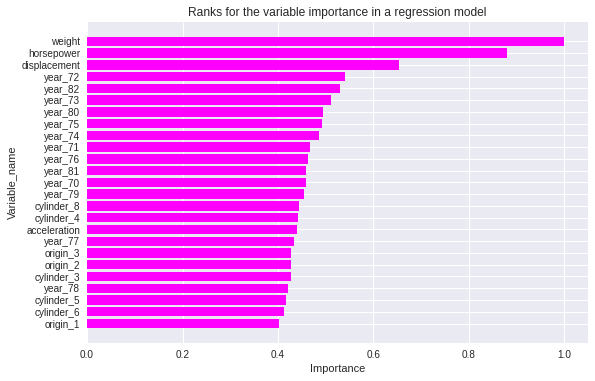

In [267]:
plt.style.use('seaborn')
Variables_ranks.sort_values(by = ['importance'], ascending= [1], inplace = True)
#Variables_ranks.importance

plt.barh(Variables_ranks['names'], Variables_ranks.importance,color = 'magenta')
plt.title('Ranks for the variable importance in a regression model')
plt.xlabel('Importance')
plt.ylabel('Variable_name')

In [2]:
#Variable importance through perturbation is usefull when working with big data such as biological data(Genes expression)
#We can applie this method to improve the accuracy of the trained algorithim by using the most important features
#We now predict a biological characteristic of a sample using dataset with bunch of columns
#This was a kaggle competion, A file to be submitted will be constructed at the end

In [44]:
import pandas as pd
import os
from IPython.display import display, HTML
from scipy.stats import zscore
from sklearn import metrics
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split



In [98]:
#Get the path for the data
if COLAB:
  path = "/content/drive/My Drive/bioresponse"
else:
  path = "./bioresponse"
train_path = os.path.join(path, 'train.csv')
test_path = os.path.join(path, 'test.csv')
submit_path = os.path.join(path,'svm_benchmark.csv')
train_data = pd.read_csv(train_path, na_values = ['NA','?'])
test_data = pd.read_csv(test_path, na_values = ['NA','?'])

In [99]:
display(train_data.head())

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,...,D1737,D1738,D1739,D1740,D1741,D1742,D1743,D1744,D1745,D1746,D1747,D1748,D1749,D1750,D1751,D1752,D1753,D1754,D1755,D1756,D1757,D1758,D1759,D1760,D1761,D1762,D1763,D1764,D1765,D1766,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,0.187856,0.0000,0.000000,0.069000,0.362012,0.301773,0.597930,0.190813,0.107219,0.070500,0.00717,0.137931,1,0.00,0.496683,0.753131,1,1,0.000000,0.262919,0.077200,0.082700,0.200590,0.00000,0.000000,0.0,0.0,0.162383,0.150153,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,0.101382,0.1875,0.193548,0.131001,0.350206,0.187419,0.762669,0.180473,0.329962,0.107681,0.01950,0.206897,0,0.75,0.449869,0.720484,0,0,0.666667,0.099400,0.289240,0.216710,0.100295,0.16958,0.235294,0.0,0.0,0.119104,0.075100,...,0,1,1,0,0,0,1,1,0,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,0.193548,0.1250,0.000000,0.068900,0.574628,0.283327,0.510633,0.184480,0.073300,0.061600,0.00566,0.000000,1,0.00,0.486610,0.803577,0,1,0.000000,0.428659,0.032400,0.072400,0.000000,0.03930,0.000000,0.0,0.0,0.076100,0.225229,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,0.000000,0.0000,0.000000,0.145947,0.584688,0.325247,0.496745,0.242288,0.087700,0.075300,0.01680,0.000000,1,0.00,0.459122,0.829482,0,1,0.000000,0.435410,0.118562,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.068900,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,0.532258,0.0000,0.000000,0.094900,0.540323,0.116775,0.552982,0.167897,0.116140,0.054200,0.01350,0.103448,1,0.00,0.381883,0.913374,0,1,0.000000,0.305333,0.054100,0.170822,0.000000,0.00000,0.176471,0.0,0.0,0.019900,0.057400,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [100]:
print(f"Train_shape: {train_data.shape}\n Test_shape :{test_data.shape}")

Train_shape: (3751, 1777)
 Test_shape :(2501, 1776)


In [101]:
label = train_data['Activity']

In [102]:
train_data.isna().sum()

Activity    0
D1          0
D2          0
D3          0
D4          0
           ..
D1772       0
D1773       0
D1774       0
D1775       0
D1776       0
Length: 1777, dtype: int64

In [104]:
#Data encoding for NNT
x_train1 = train_data.drop('Activity', axis = 1)
x_train1.head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,D40,...,D1737,D1738,D1739,D1740,D1741,D1742,D1743,D1744,D1745,D1746,D1747,D1748,D1749,D1750,D1751,D1752,D1753,D1754,D1755,D1756,D1757,D1758,D1759,D1760,D1761,D1762,D1763,D1764,D1765,D1766,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,0.187856,0.0000,0.000000,0.069000,0.362012,0.301773,0.597930,0.190813,0.107219,0.070500,0.00717,0.137931,1,0.00,0.496683,0.753131,1,1,0.000000,0.262919,0.077200,0.082700,0.200590,0.00000,0.000000,0.0,0.0,0.162383,0.150153,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,0.101382,0.1875,0.193548,0.131001,0.350206,0.187419,0.762669,0.180473,0.329962,0.107681,0.01950,0.206897,0,0.75,0.449869,0.720484,0,0,0.666667,0.099400,0.289240,0.216710,0.100295,0.16958,0.235294,0.0,0.0,0.119104,0.075100,0.000000,...,0,1,1,0,0,0,1,1,0,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,1,1,0,1,0,0,1,0
2,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,0.193548,0.1250,0.000000,0.068900,0.574628,0.283327,0.510633,0.184480,0.073300,0.061600,0.00566,0.000000,1,0.00,0.486610,0.803577,0,1,0.000000,0.428659,0.032400,0.072400,0.000000,0.03930,0.000000,0.0,0.0,0.076100,0.225229,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,0.000000,0.0000,0.000000,0.145947,0.584688,0.325247,0.496745,0.242288,0.087700,0.075300,0.01680,0.000000,1,0.00,0.459122,0.829482,0,1,0.000000,0.435410,0.118562,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.068900,0.000000,0.148444,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,0.532258,0.0000,0.000000,0.094900,0.540323,0.116775,0.552982,0.167897,0.116140,0.054200,0.01350,0.103448,1,0.00,0.381883,0.913374,0,1,0.000000,0.305333,0.054100,0.170822,0.000000,0.00000,0.176471,0.0,0.0,0.019900,0.057400,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [105]:

x_train = x_train1.values

In [12]:
label[0:10]

0    1
1    1
2    1
3    1
4    0
5    0
6    1
7    1
8    1
9    0
Name: Activity, dtype: int64

In [106]:
y_train = label.values

In [107]:
y_train[0:10]

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [108]:
display(test_data.head())

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,D40,...,D1737,D1738,D1739,D1740,D1741,D1742,D1743,D1744,D1745,D1746,D1747,D1748,D1749,D1750,D1751,D1752,D1753,D1754,D1755,D1756,D1757,D1758,D1759,D1760,D1761,D1762,D1763,D1764,D1765,D1766,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,0.366667,0.611765,0.05,0.0,0.110435,0.803973,0.106075,0.473965,0.835617,0.106452,0.103855,0.1875,0.0,0.135949,0.350206,0.187419,0.756282,0.201911,0.316854,0.104583,0.01870,0.241379,0,0.75,0.423439,0.732260,0,0,0.666667,0.096500,0.199044,0.190843,0.187285,0.16958,0.294118,0.0000,0.000000,0.04800,0.150153,0.0000,...,0,1,1,0,0,0,0,1,0,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,1,1,0,1,0,0,1,0
1,0.100000,0.758175,0.30,0.0,0.180128,0.621378,0.287144,0.503919,0.674919,0.403616,0.125237,0.0625,0.0,0.183958,0.359572,0.372014,0.508107,0.276535,0.101973,0.049800,0.00548,0.137931,1,0.00,0.360849,0.701909,1,1,0.166667,0.168664,0.031100,0.050400,0.200590,0.00000,0.242456,0.0958,0.220103,0.00923,0.000000,0.0000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.100000,0.658812,0.10,0.0,0.243421,0.640959,0.312765,0.279784,0.686775,0.280301,0.266129,0.0625,0.0,0.122230,0.586479,0.227994,0.368400,0.107220,0.043600,0.068400,0.00776,0.034500,1,0.00,0.367166,0.917836,0,1,0.000000,0.510178,0.032400,0.052700,0.000000,0.00000,0.058800,0.0000,0.000000,0.07650,0.000000,0.0000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.100000,0.655752,0.10,0.0,0.226978,0.776996,0.150657,0.336948,0.802121,0.125608,0.118280,0.0625,0.0,0.126692,0.527341,0.122608,0.530575,0.159911,0.071800,0.042500,0.00589,0.034500,1,0.00,0.396976,0.896885,1,1,0.000000,0.495344,0.110121,0.099100,0.000000,0.00000,0.058800,0.0000,0.000000,0.03990,0.000000,0.0637,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.000000,0.484851,0.00,0.0,0.561200,0.771463,0.244287,0.293096,0.717575,0.230842,0.000000,0.0000,0.0,0.443063,0.546064,0.401079,0.415092,0.003930,0.112314,0.071400,0.00663,0.000000,1,0.00,0.474608,0.809131,0,1,0.000000,0.184156,0.000000,0.010300,0.000000,0.00000,0.000000,0.0620,0.307492,0.00000,0.000000,0.0000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [109]:
cols = train_data.drop('Activity',axis = 1).columns
cols



x_submit = test_data[cols].values.astype(np.float32)


In [110]:
x_submit[0:2]

array([[0.36666667, 0.6117645 , 0.05      , ..., 0.        , 1.        ,
        0.        ],
       [0.1       , 0.7581746 , 0.3       , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [111]:
x_tr, x_ts, y_tr, y_ts = train_test_split(x_train, y_train, test_size = 0.25, random_state = 1234)

In [112]:
#Building the model
model = Sequential()
model.add(Dense(50, 
                input_dim = x_train1.shape[1], 
                activation = 'relu',kernel_initializer = 'random_normal'))
model.add(Dense(25, activation = 'relu', kernel_initializer='random_normal'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam')
info = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, mode ='auto',
                    verbose = 1, patience = 5, restore_best_weights = True)
model.fit(x_tr, y_tr, validation_data = (x_ts, y_ts), callbacks = [info],
          verbose = 2, epochs = 1000)


Epoch 1/1000
88/88 - 0s - loss: 0.6165 - val_loss: 0.5641
Epoch 2/1000
88/88 - 0s - loss: 0.4930 - val_loss: 0.5252
Epoch 3/1000
88/88 - 0s - loss: 0.4543 - val_loss: 0.5508
Epoch 4/1000
88/88 - 0s - loss: 0.4111 - val_loss: 0.5539
Epoch 5/1000
88/88 - 0s - loss: 0.3818 - val_loss: 0.5324
Epoch 6/1000
88/88 - 0s - loss: 0.3643 - val_loss: 0.5332
Epoch 7/1000
Restoring model weights from the end of the best epoch.
88/88 - 0s - loss: 0.3440 - val_loss: 0.5537
Epoch 00007: early stopping


In [113]:
pred = model.predict(x_ts).flatten()

In [114]:
pred = np.clip(pred, a_min = 1e-6, a_max = (1 - 1e-6))


In [115]:
loss_score = metrics.log_loss(y_ts, pred)
loss_score

0.5252314124540336

In [116]:
pred = pred > 0.5
acc_score = metrics.accuracy_score(y_ts, pred)
acc_score

0.7409381663113006

In [118]:
# Building a file to submit
pred_sbt = model.predict(x_submit)

# Clip so that min is never exactly 0, max never 1 (would be a NaN score)
pred = np.clip(pred,a_min=1e-6,a_max=(1-1e-6)) 
submit_df = pd.DataFrame({'MoleculeId':[x+1 for x \
        in range(len(pred_sbt))],'PredictedProbability':\
                          pred_sbt.flatten()})
submit_df.to_csv(submit_path, index=False)

In [119]:
#Get the list of important variable
colms = list(train_data)
colms.remove('Activity')



In [124]:
variables_rank = var_rank(model,x_ts, y_ts,colms, False)
display(variables_rank[0:10])

,names,errors,importance
0,D27,0.562518,1.000000
1,D1036,0.528453,0.939443
2,D1159,0.528207,0.939004
3,D1271,0.527971,0.938585
4,D1052,0.527684,0.938076
5,D1100,0.527556,0.937847
6,D998,0.527483,0.937718
7,D211,0.527454,0.937666
8,D961,0.527420,0.937605
9,D237,0.527339,0.937462
